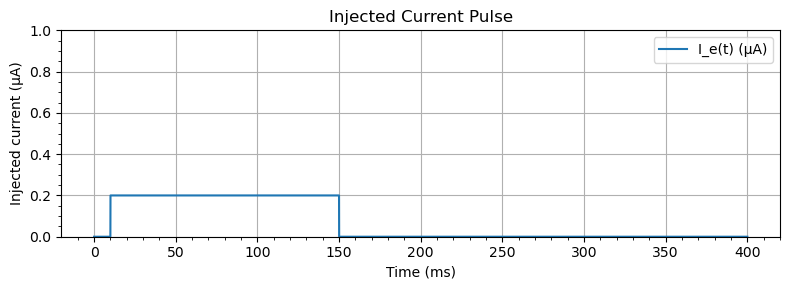

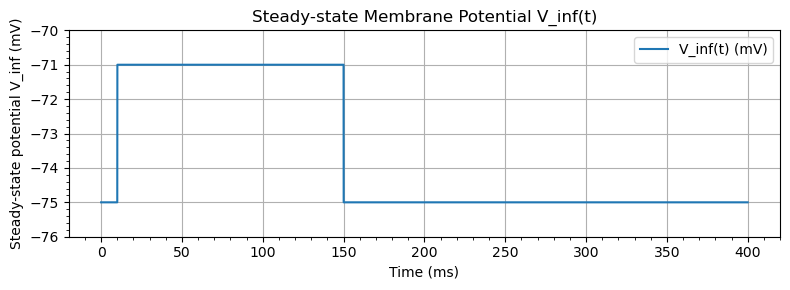

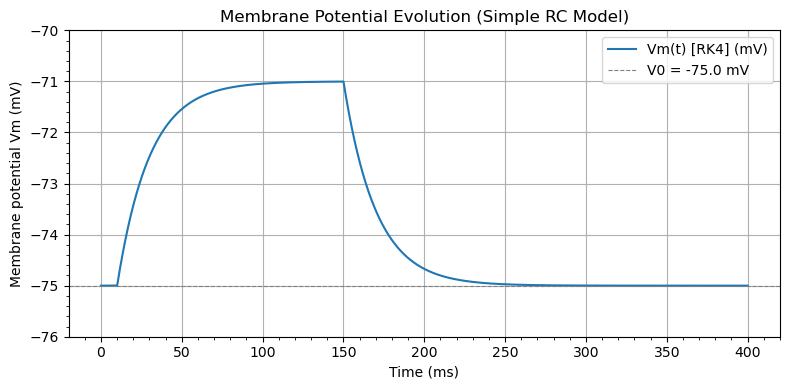

In [64]:
"""
Simulating a simple HH model version,
only considering potassium conductance (time- and voltage-independent, constant)
and membrane capacitance.

Units:
 - C in µF
 - Rk in kΩ
 - Ek, V0 in mV
 - I0 in µA
 - time in ms
"""
import numpy as np
import matplotlib.pyplot as plt

# -------------------------
# Parameters (requested units)
# -------------------------
C = 1.0        # Capacitance (µF)
Rk = 20.0      # Resistance (kΩ)  
Ek = -75.0     # Potassium reversal potential (mV)
I0 = 0.2       # Injected current (µA)
V0 = -75.0     # Initial membrane potential (mV) 
t_max = 400.0  # Simulation time (ms)  
dt = 0.01      # Time step (ms)
t_on = 10.0    # current injected at t_on (ms)
t_off = 150.0  # current removed at t_off (ms)

# -------------------------
# Time vector and current
# -------------------------
t = np.arange(0.0, t_max + dt, dt)
Ie = np.zeros_like(t)

# --- injected current step function with time (kept loop structure, clarified)
for i in range(len(t)):
    if t[i] < t_on:
        Ie[i] = 0.0
    elif (t_on <= t[i]) and (t[i] < t_off):
        Ie[i] = I0
    else:
        Ie[i] = 0.0

# -------------------------
# Derived quantities (consistent units)
# tau (ms) = Rk(kΩ) * C(µF)  because kΩ * µF = 1 ms numerically
# V_inf (mV) = Ek (mV) + Rk(kΩ) * Ie(µA)  because kΩ * µA = mV numerically
# -------------------------
tau = Rk * C               # Membrane time constant (ms)
V_inf = Ek + Rk * Ie       # Steady-state potential (mV)

# -------------------------
# RK4 METHOD (time evolution)
# dVm/dt in mV per ms
# -------------------------
def dVm_dt(Vm, Vinf, tau):
    return - (1.0 / tau) * (Vm - Vinf)

Vm = np.zeros_like(t)
Vm[0] = V0
for i in range(1, len(t)):
    y = Vm[i-1]
    z = V_inf[i-1]
    k1 = dVm_dt(y, z, tau)
    k2 = dVm_dt(y + 0.5 * dt * k1, z, tau)
    k3 = dVm_dt(y + 0.5 * dt * k2, z, tau)
    k4 = dVm_dt(y + dt * k3, z, tau)
    Vm[i] = y + (dt / 6.0) * (k1 + 2*k2 + 2*k3 + k4)

# -------------------------
# Plots 
# -------------------------
plt.figure(figsize=(8,3))
plt.plot(t, Ie, label="I_e(t) (µA)")
plt.xlabel("Time (ms)")
plt.ylabel("Injected current (µA)")
plt.title("Injected Current Pulse")
plt.ylim(0,1)
plt.legend()
plt.minorticks_on()
plt.grid()
plt.tight_layout()
plt.show()

plt.figure(figsize=(8,3))
plt.plot(t, V_inf, label="V_inf(t) (mV)")
plt.xlabel("Time (ms)")
plt.ylabel("Steady-state potential V_inf (mV)")
plt.title("Steady-state Membrane Potential V_inf(t)")
plt.ylim(-76,-70)
plt.legend()
plt.minorticks_on()
plt.grid()
plt.tight_layout()
plt.show()

plt.figure(figsize=(8,4))
plt.plot(t, Vm, label="Vm(t) [RK4] (mV)")
plt.axhline(V0, color='gray', linestyle='--', linewidth=0.8, label=f"V0 = {V0:.1f} mV")
plt.xlabel("Time (ms)")
plt.ylabel("Membrane potential Vm (mV)")
plt.title("Membrane Potential Evolution (Simple RC Model)")
plt.ylim(-76,-70)
plt.legend()
plt.minorticks_on()
plt.grid()
plt.tight_layout()
plt.show()